# Analysis of R1 model data

A quick exploratory analysis of R1 model dataset obtained from Victor. 
Dataset URL - TBA

In [22]:
%matplotlib inline
from matplotlib.pylab import *

base_dir = '/home/ubuntu/projects/S2B/shared/'
pdm_fname = base_dir + 'pdm.py'

import importlib.util
import sys
from scipy import stats as st
from matplotlib.colors import LogNorm


spec = importlib.util.spec_from_file_location("pdm", pdm_fname)
pdm = importlib.util.module_from_spec(spec)
sys.modules["pdm"] = pdm
spec.loader.exec_module(pdm)

density = {}

rcParams['figure.figsize'] = (10,6)
rcParams['font.size'] = 18

## Basic data loading/exploration

Converting simulation snapshot from TXT to CSV without header.

In [2]:
data_fname_txt = base_dir + 'modelR1GaiaChallenge'
data_fname_csv = base_dir + 'modelR1GaiaChallenge.csv'

fin = open(data_fname_txt, "rt")
fout = open(data_fname_csv, "wt")

for line in fin:
	fout.write(','.join(line.split())+'\n')
	
fin.close()
fout.close()

Loading a simulation snapshot using the DataLoad function.

In [12]:
data_fname_csv = base_dir + 'modelR1GaiaChallenge.csv'

fulldata = pdm.LoadData(data_fname_csv)

# Extracting position and velocity components

x = fulldata['x'].values
y = fulldata['y'].values
z = fulldata['z'].values
vx = fulldata['vx'].values
vy = fulldata['vy'].values
vz = fulldata['vz'].values

Loading data from file...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:09.345898



Note that the above assumes you have downloaded and unpacked the test data in the above folder.

In [4]:
fulldata

,x,y,z,vx,vy,vz
0,-1.185589,0.387044,0.281643,-97.199440,15.530616,-151.944020
1,0.400003,0.248072,-0.052701,-175.684660,223.813430,184.672410
2,-1.075962,-0.556421,-0.074970,135.597960,-137.675350,112.960140
3,0.286717,-0.415261,-0.315247,-187.211410,135.309400,140.030750
4,2.270559,-5.669712,0.150554,132.960450,-53.119793,-6.670953
...,...,...,...,...,...,...
7489264,1.020411,6.630146,-0.056567,-177.197140,58.544037,12.184828
7489265,-6.177278,-5.034438,-0.627045,98.728691,-62.081703,47.792080
7489266,5.812231,5.643428,-0.082499,-156.720230,19.514315,-34.014992
7489267,-5.958895,-5.522880,-0.025485,157.024120,-21.070320,-27.067957


In [13]:
len(fulldata)

7489269

## Accessing data

To access any of these arrays or vectors, you access them like a python list: 

In [14]:
print('x', x)
print('y', y)
print('z', z)
print()

print('vx', vx)
print('vy', vy)
print('vz', vz)
print()

x [-1.1855888   0.40000296 -1.0759624  ...  5.8122311  -5.9588952
  5.6456079 ]
y [ 0.3870438   0.24807201 -0.55642074 ...  5.6434278  -5.5228796
  5.5886564 ]
z [ 0.28164312 -0.05270057 -0.07496975 ... -0.08249884 -0.02548528
  0.08627713]

vx [ -97.19944 -175.68466  135.59796 ... -156.72023  157.02412 -162.69707]
vy [  15.530616  223.81343  -137.67535  ...   19.514315  -21.07032
   14.673622]
vz [-151.94402   184.67241   112.96014  ...  -34.014992  -27.067957
  -19.854509]



## Calculate and plot binned 2d-statistics

Let us calculate the binned 2d stats for number density and plot face-on view.
We look at the entire data, limiting us by 15 kpc radius.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:01.127229



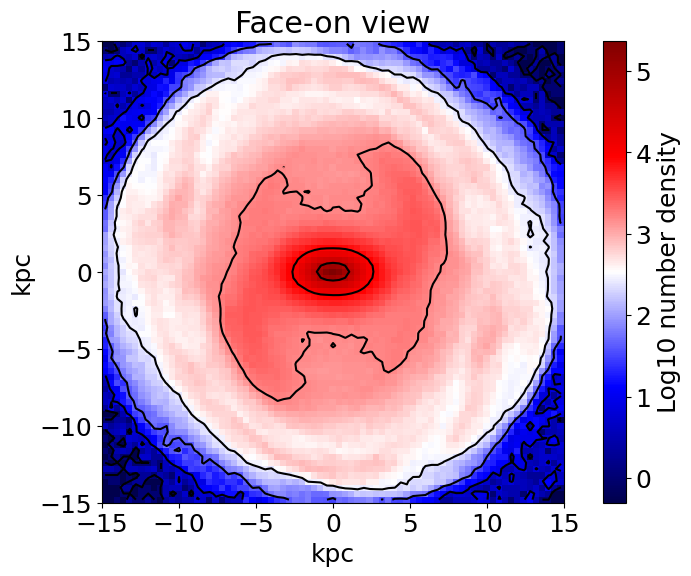

<Figure size 1000x600 with 0 Axes>

In [15]:
plt_title = 'Face-on view'
cbar_label = 'Log10 number density'
xlim, ylim = 15, 15

pdm.RenderDensity(x,y,'None',xlim,ylim,plt_title,cbar_label)

Let us rotate to 90 degree around X axis for edge-on view, calculate the binned 2d stats and plot.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:00.926809



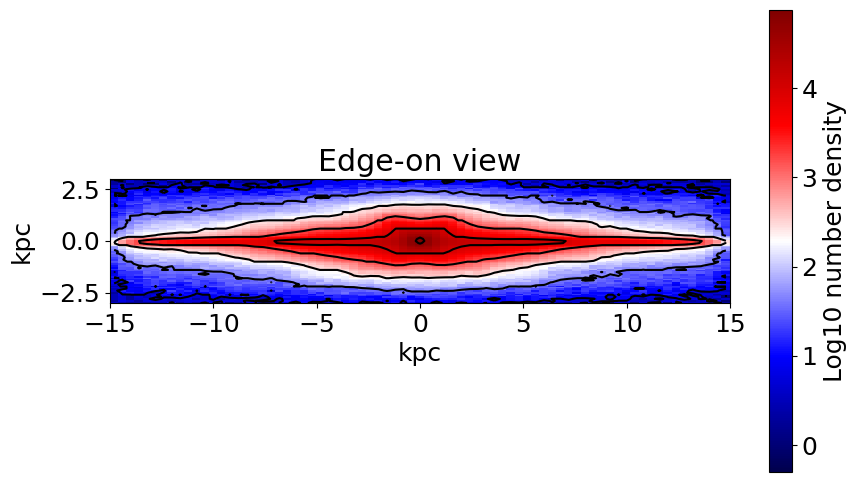

<Figure size 1000x600 with 0 Axes>

In [16]:
plt_title = 'Edge-on view'
cbar_label = 'Log10 number density'
xlim, ylim = 15, 3

# Rotate to 90 around X axis for edge-on view
# Extracting position and velocity components

pos_data = pdm.mat_rotate_x(x, y, z, 90)
x = pos_data[:,0]
y = pos_data[:,1]
z = pos_data[:,2]

v_data = pdm.mat_rotate_x(vx, vy, vz, 90)
vx = v_data[:,0]
vy = v_data[:,1]
vz = v_data[:,2]

pdm.RenderDensity(x,y,z,xlim,ylim,plt_title,cbar_label)

Now we calculate binned 2d stats for moment 3, using edge-on orientation.
We zoom in on central area 16 x 6 kpc.

Rendering h3 moment stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:08.505257



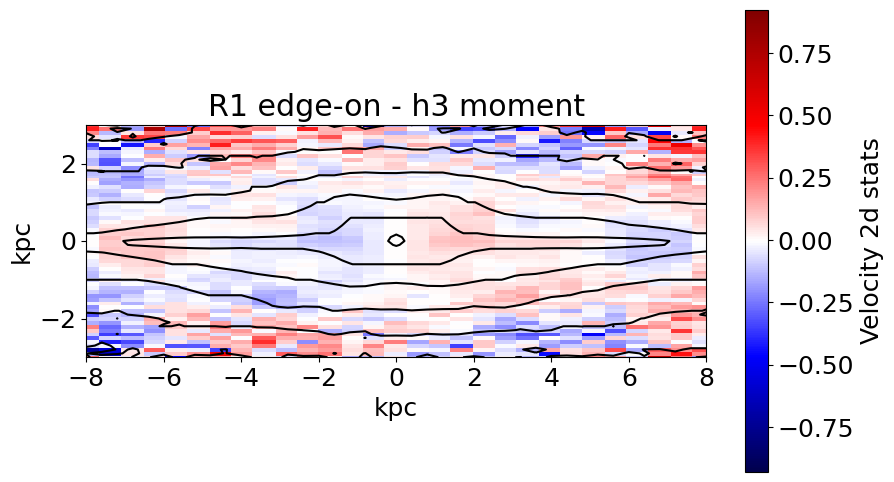

<Figure size 1000x600 with 0 Axes>

In [17]:
plt_title = 'R1 edge-on - h3 moment'
cbar_label = 'Velocity 2d stats'
xlim, ylim = 8, 3
m = 3

pdm.RenderMoment(m,x,y,vz,xlim,ylim,plt_title,cbar_label)

Now we calculate binned 2d stats for moment 4 using edge-on orientation.
We zoom in on central area 16 x 6 kpc.

Rendering h4 moment stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:08.546684



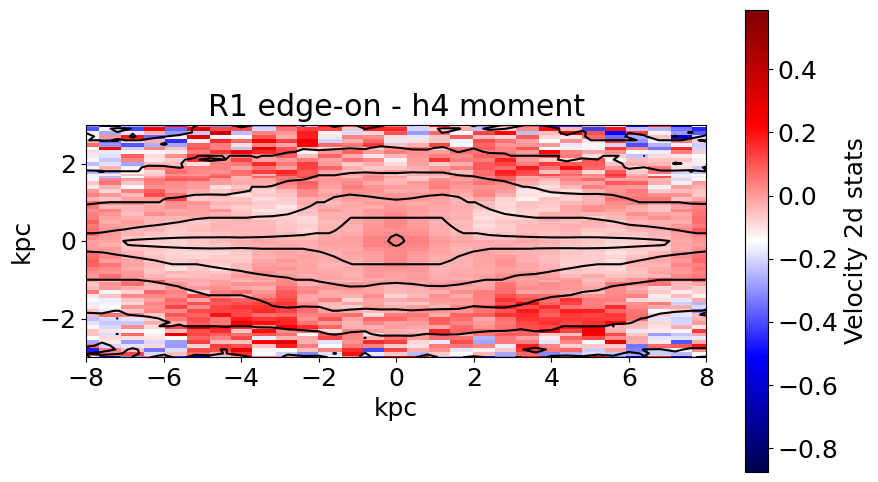

<Figure size 1000x600 with 0 Axes>

In [18]:
plt_title = 'R1 edge-on - h4 moment'
cbar_label = 'Velocity 2d stats'
xlim, ylim = 8, 3
m = 4

pdm.RenderMoment(m,x,y,vz,xlim,ylim,plt_title,cbar_label)

Plot mean velocity and dispersion.

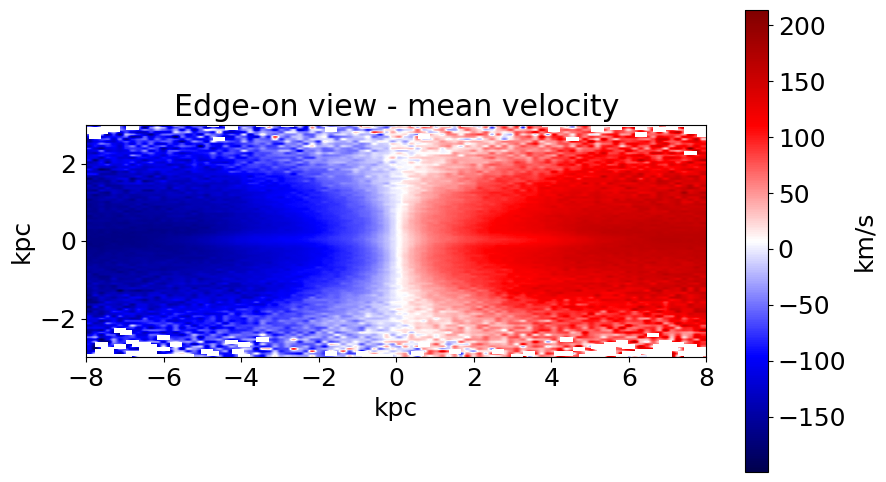

In [25]:
# Zoom in
xlim, ylim = 8, 3

cmap = 'seismic'
bins = 100

stat2d,xedges,yedges,binnum2d = st.binned_statistic_2d(x, y, vz,
                              statistic = 'mean',
                              range = [[-xlim,xlim],[-ylim,ylim]],
                              bins = bins)

image = plt.imshow(stat2d.T, 
                    origin = 'lower',
                    extent = [-xlim, xlim, -ylim, ylim ],
                    cmap=cmap)

plt_title = 'Edge-on view - mean velocity'
cbar_label = 'km/s'

plt.title(plt_title)  
cbar = plt.colorbar()
cbar.set_label(cbar_label)
axes = plt.gca()
axes.set_aspect(1)
axes.set_xlabel('kpc')
axes.set_ylabel('kpc')
axes.set_xlim(-xlim, xlim)
axes.set_ylim(-ylim, ylim)
plt.show()

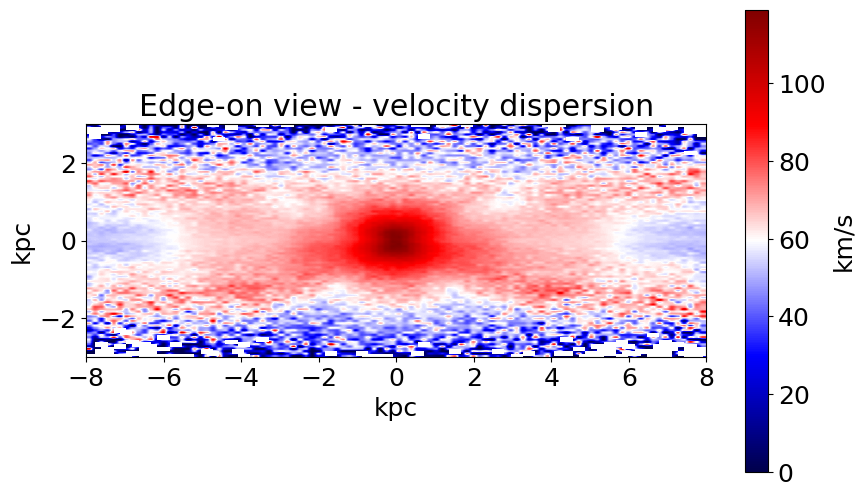

In [26]:
# Zoom in
xlim, ylim = 8, 3

cmap = 'seismic'
bins = 100

stat2d,xedges,yedges,binnum2d = st.binned_statistic_2d(x, y, vz,
                              statistic = 'std',
                              range = [[-xlim,xlim],[-ylim,ylim]],
                              bins = bins)

image = plt.imshow(stat2d.T, 
                    origin = 'lower',
                    extent = [-xlim, xlim, -ylim, ylim ],
                    cmap=cmap)

plt_title = 'Edge-on view - velocity dispersion'
cbar_label = 'km/s'

plt.title(plt_title)  
cbar = plt.colorbar()
cbar.set_label(cbar_label)
axes = plt.gca()
axes.set_aspect(1)
axes.set_xlabel('kpc')
axes.set_ylabel('kpc')
axes.set_xlim(-xlim, xlim)
axes.set_ylim(-ylim, ylim)
plt.show()